In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving mushroom.csv to mushroom.csv


In [ ]:
mush=pd.read_csv('mushroom.csv')
mush

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [ ]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
mush.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [ ]:
mush.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
mush['cap_shape'].unique()

array(['sunken', 'flat', 'bell', 'convex', 'conical'], dtype=object)

In [ ]:
mush['cap_surface'].unique()

array(['scaly', 'fibrous', 'grooves', 'smooth'], dtype=object)

In [ ]:
mush['cap_color'].unique()

array(['white', 'red', 'purple', 'pink', 'yellow', 'brown', 'green',
       'buff', 'gray'], dtype=object)

In [ ]:
mush['bruises'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
mush[mush.duplicated()]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,bell,smooth,pink,no,foul,notched,distant,broad,pink,enlarging,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,enlarging,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,conical,grooves,brown,no,foul,free,distant,broad,white,tapering,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,sunken,smooth,white,no,anise,attached,crowded,broad,black,tapering,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,enlarging,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,flat,scaly,pink,no,spicy,attached,distant,narrow,red,enlarging,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [ ]:
mush.drop_duplicates(inplace = True)

In [ ]:
mush[mush.duplicated()]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter


In [ ]:
mush.describe()

,stalk_height,cap_diameter
count,976.000000,976.000000
mean,8.524684,12.598566
std,3.703043,6.987077
min,2.000000,1.000000
25%,5.326820,6.141161
50%,8.367245,12.626094
75%,11.758624,18.559780
max,15.095066,25.000054


**LABEL** **ENCODING**

In [ ]:
mush[0:5]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
mush.dtypes

cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [ ]:
labelencoder = LabelEncoder()
mush['cap_shape'] = labelencoder.fit_transform(mush.loc[:,['cap_shape']])
mush['cap_surface'] = labelencoder.fit_transform(mush.loc[:,['cap_surface']])
mush['cap_color'] = labelencoder.fit_transform(mush.loc[:,['cap_color']])
mush['bruises'] = labelencoder.fit_transform(mush.loc[:,['bruises']])
mush['odor'] = labelencoder.fit_transform(mush.loc[:,['odor']])
mush['gill_attachment'] = labelencoder.fit_transform(mush.loc[:,['gill_attachment']])
mush['gill_spacing'] = labelencoder.fit_transform(mush.loc[:,['gill_spacing']])
mush['gill_size'] = labelencoder.fit_transform(mush.loc[:,['gill_size']])
mush['gill_color'] = labelencoder.fit_transform(mush.loc[:,['gill_color']])
mush['stalk_shape'] = labelencoder.fit_transform(mush.loc[:,['stalk_shape']])
mush['stalk_root'] = labelencoder.fit_transform(mush.loc[:,['stalk_root']])
mush['stalk_surface_above_ring'] = labelencoder.fit_transform(mush.loc[:,['stalk_surface_above_ring']])
mush['stalk_surface_below_ring'] = labelencoder.fit_transform(mush.loc[:,['stalk_surface_below_ring']])
mush['stalk_color_above_ring'] = labelencoder.fit_transform(mush.loc[:,['stalk_color_above_ring']])
mush['stalk_color_below_ring'] = labelencoder.fit_transform(mush.loc[:,['stalk_color_below_ring']])
mush['veil_type'] = labelencoder.fit_transform(mush.loc[:,['veil_type']])
mush['veil_color'] = labelencoder.fit_transform(mush.loc[:,['veil_color']])
mush['ring_number'] = labelencoder.fit_transform(mush.loc[:,['ring_number']])
mush['ring_type'] = labelencoder.fit_transform(mush.loc[:,['ring_type']])
mush['spore_print_color'] = labelencoder.fit_transform(mush.loc[:,['spore_print_color']])
mush['population'] = labelencoder.fit_transform(mush.loc[:,['population']])
mush['habitat'] = labelencoder.fit_transform(mush.loc[:,['habitat']])
mush['class'] = labelencoder.fit_transform(mush.loc[:,['class']])

mush

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1,1,0,0,4,3,1,0,3,1,...,1,0,0,3,1,2,3,0,13.020616,9.993008
1988,0,1,4,1,1,1,2,0,1,0,...,0,0,2,5,8,2,0,1,3.751597,18.868135
1989,4,3,5,1,1,1,1,1,2,1,...,1,1,2,4,5,0,0,0,13.134058,15.740028
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,6.500840,13.501957


In [ ]:
mush.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [ ]:
mush.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

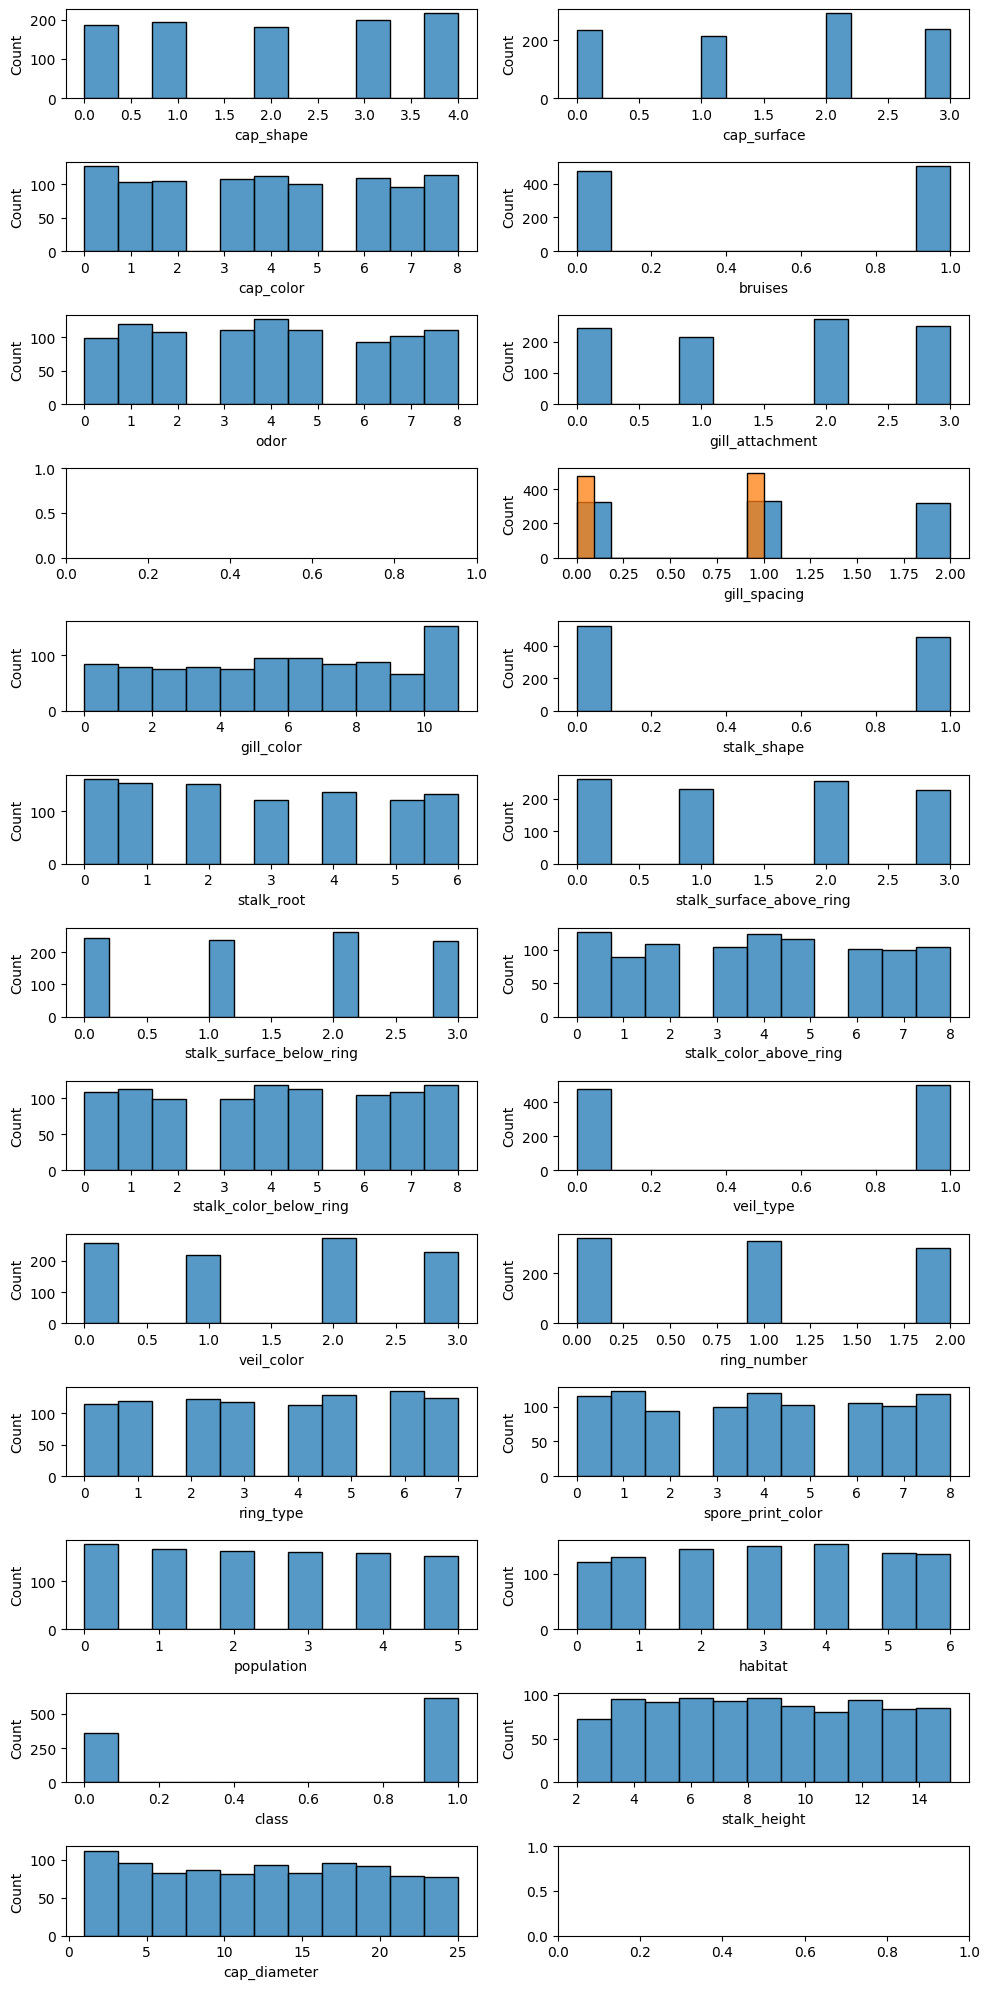

In [ ]:
# PLOTTING HISTOGRAM ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(13, 2, figsize=(10, 20))

sns.histplot(mush['cap_shape'], ax = ax[0,0])
sns.histplot(mush['cap_surface'], ax = ax[0,1])
sns.histplot(mush['cap_color'], ax = ax[1,0])
sns.histplot(mush['bruises'], ax = ax[1,1])
sns.histplot(mush['odor'], ax = ax[2,0])
sns.histplot(mush['gill_attachment'], ax = ax[2,1])
sns.histplot(mush['gill_spacing'], ax = ax[3,1])
sns.histplot(mush['gill_size'], ax = ax[3,1])
sns.histplot(mush['gill_color'], ax = ax[4,0])
sns.histplot(mush['stalk_shape'], ax = ax[4,1])
sns.histplot(mush['stalk_root'], ax = ax[5,0])
sns.histplot(mush['stalk_surface_above_ring'], ax = ax[5,1])
sns.histplot(mush['stalk_surface_below_ring'], ax = ax[6,0])
sns.histplot(mush['stalk_color_above_ring'], ax = ax[6,1])
sns.histplot(mush['stalk_color_below_ring'], ax = ax[7,0])
sns.histplot(mush['veil_type'], ax = ax[7,1])
sns.histplot(mush['veil_color'], ax = ax[8,0])
sns.histplot(mush['ring_number'], ax = ax[8,1])
sns.histplot(mush['ring_type'], ax = ax[9,0])
sns.histplot(mush['spore_print_color'], ax = ax[9,1])
sns.histplot(mush['population'], ax = ax[10,0])
sns.histplot(mush['habitat'], ax = ax[10,1])
sns.histplot(mush['class'], ax = ax[11,0])
sns.histplot(mush['stalk_height'], ax = ax[11,1])
sns.histplot(mush['cap_diameter'], ax = ax[12,0])

plt.tight_layout()

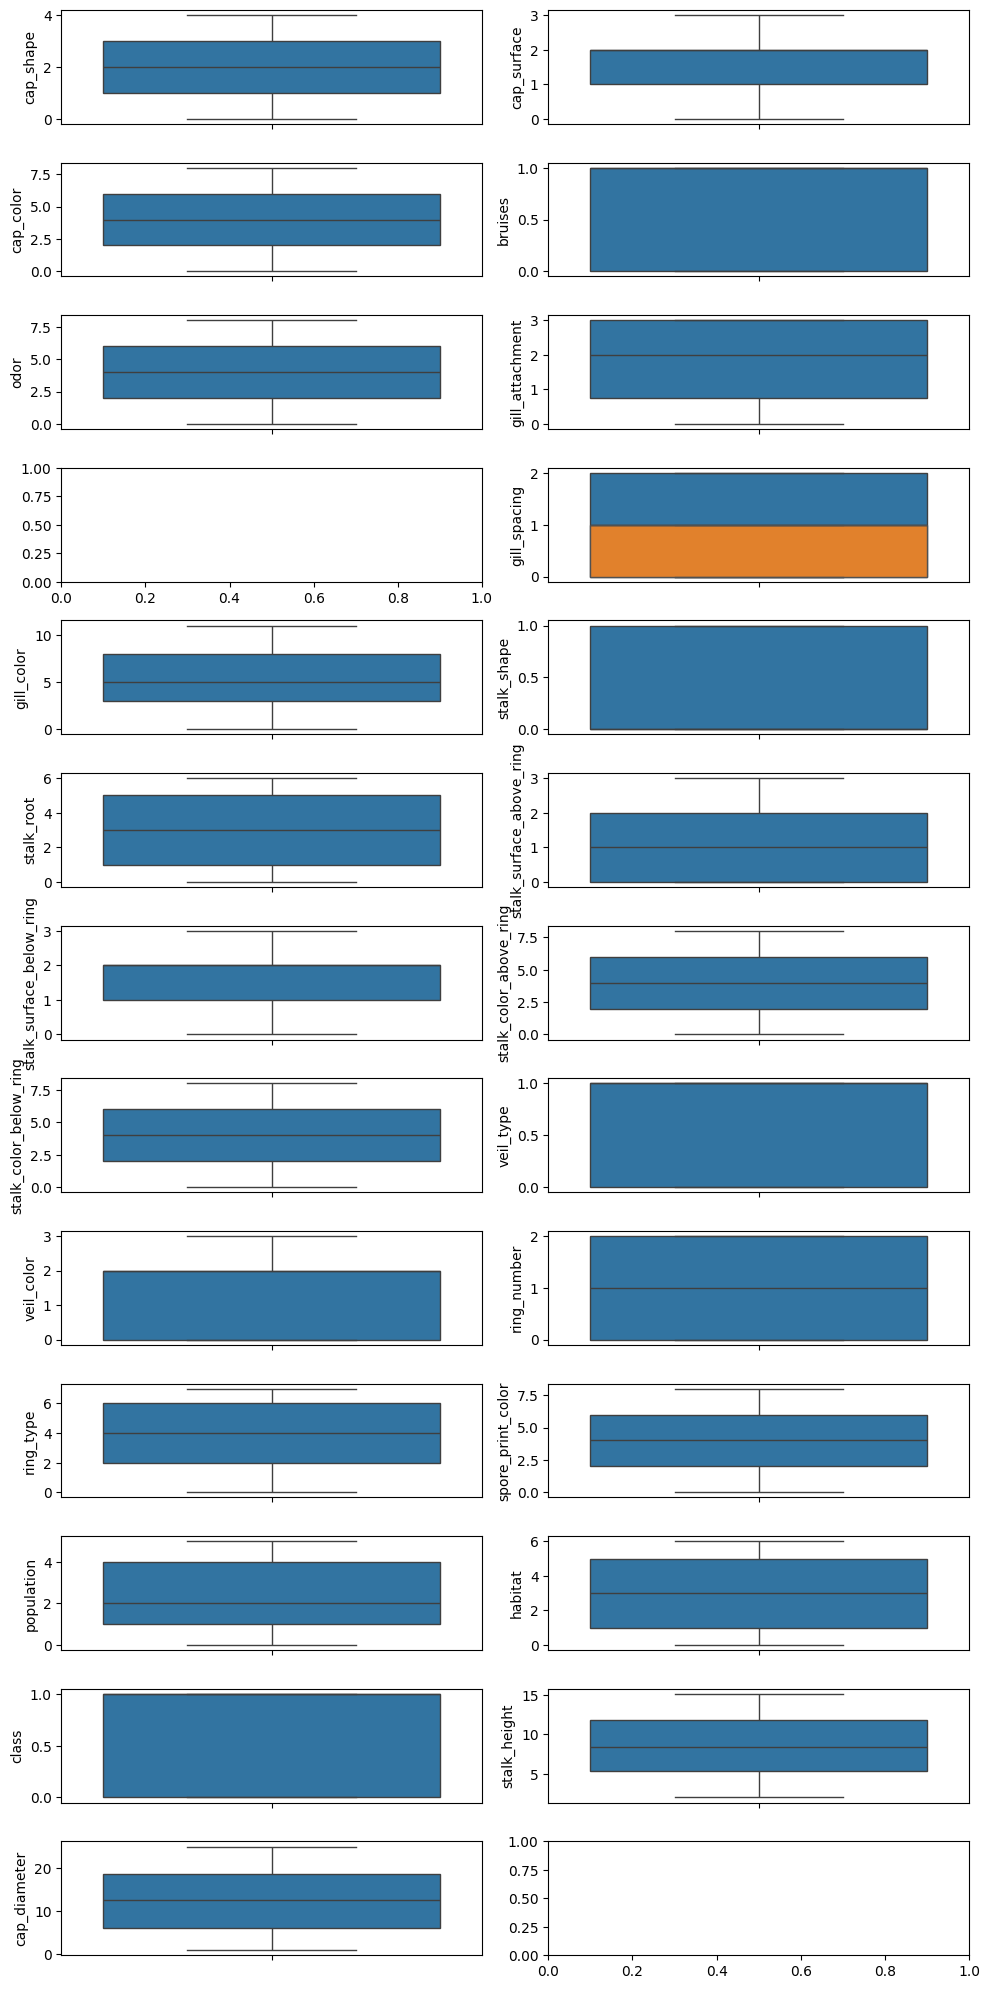

In [ ]:
# PLOTTING BOXPLOT ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(13, 2, figsize=(10, 20))

sns.boxplot(mush['cap_shape'], ax = ax[0,0])
sns.boxplot(mush['cap_surface'], ax = ax[0,1])
sns.boxplot(mush['cap_color'], ax = ax[1,0])
sns.boxplot(mush['bruises'], ax = ax[1,1])
sns.boxplot(mush['odor'], ax = ax[2,0])
sns.boxplot(mush['gill_attachment'], ax = ax[2,1])
sns.boxplot(mush['gill_spacing'], ax = ax[3,1])
sns.boxplot(mush['gill_size'], ax = ax[3,1])
sns.boxplot(mush['gill_color'], ax = ax[4,0])
sns.boxplot(mush['stalk_shape'], ax = ax[4,1])
sns.boxplot(mush['stalk_root'], ax = ax[5,0])
sns.boxplot(mush['stalk_surface_above_ring'], ax = ax[5,1])
sns.boxplot(mush['stalk_surface_below_ring'], ax = ax[6,0])
sns.boxplot(mush['stalk_color_above_ring'], ax = ax[6,1])
sns.boxplot(mush['stalk_color_below_ring'], ax = ax[7,0])
sns.boxplot(mush['veil_type'], ax = ax[7,1])
sns.boxplot(mush['veil_color'], ax = ax[8,0])
sns.boxplot(mush['ring_number'], ax = ax[8,1])
sns.boxplot(mush['ring_type'], ax = ax[9,0])
sns.boxplot(mush['spore_print_color'], ax = ax[9,1])
sns.boxplot(mush['population'], ax = ax[10,0])
sns.boxplot(mush['habitat'], ax = ax[10,1])
sns.boxplot(mush['class'], ax = ax[11,0])
sns.boxplot(mush['stalk_height'], ax = ax[11,1])
sns.boxplot(mush['cap_diameter'], ax = ax[12,0])

plt.tight_layout()

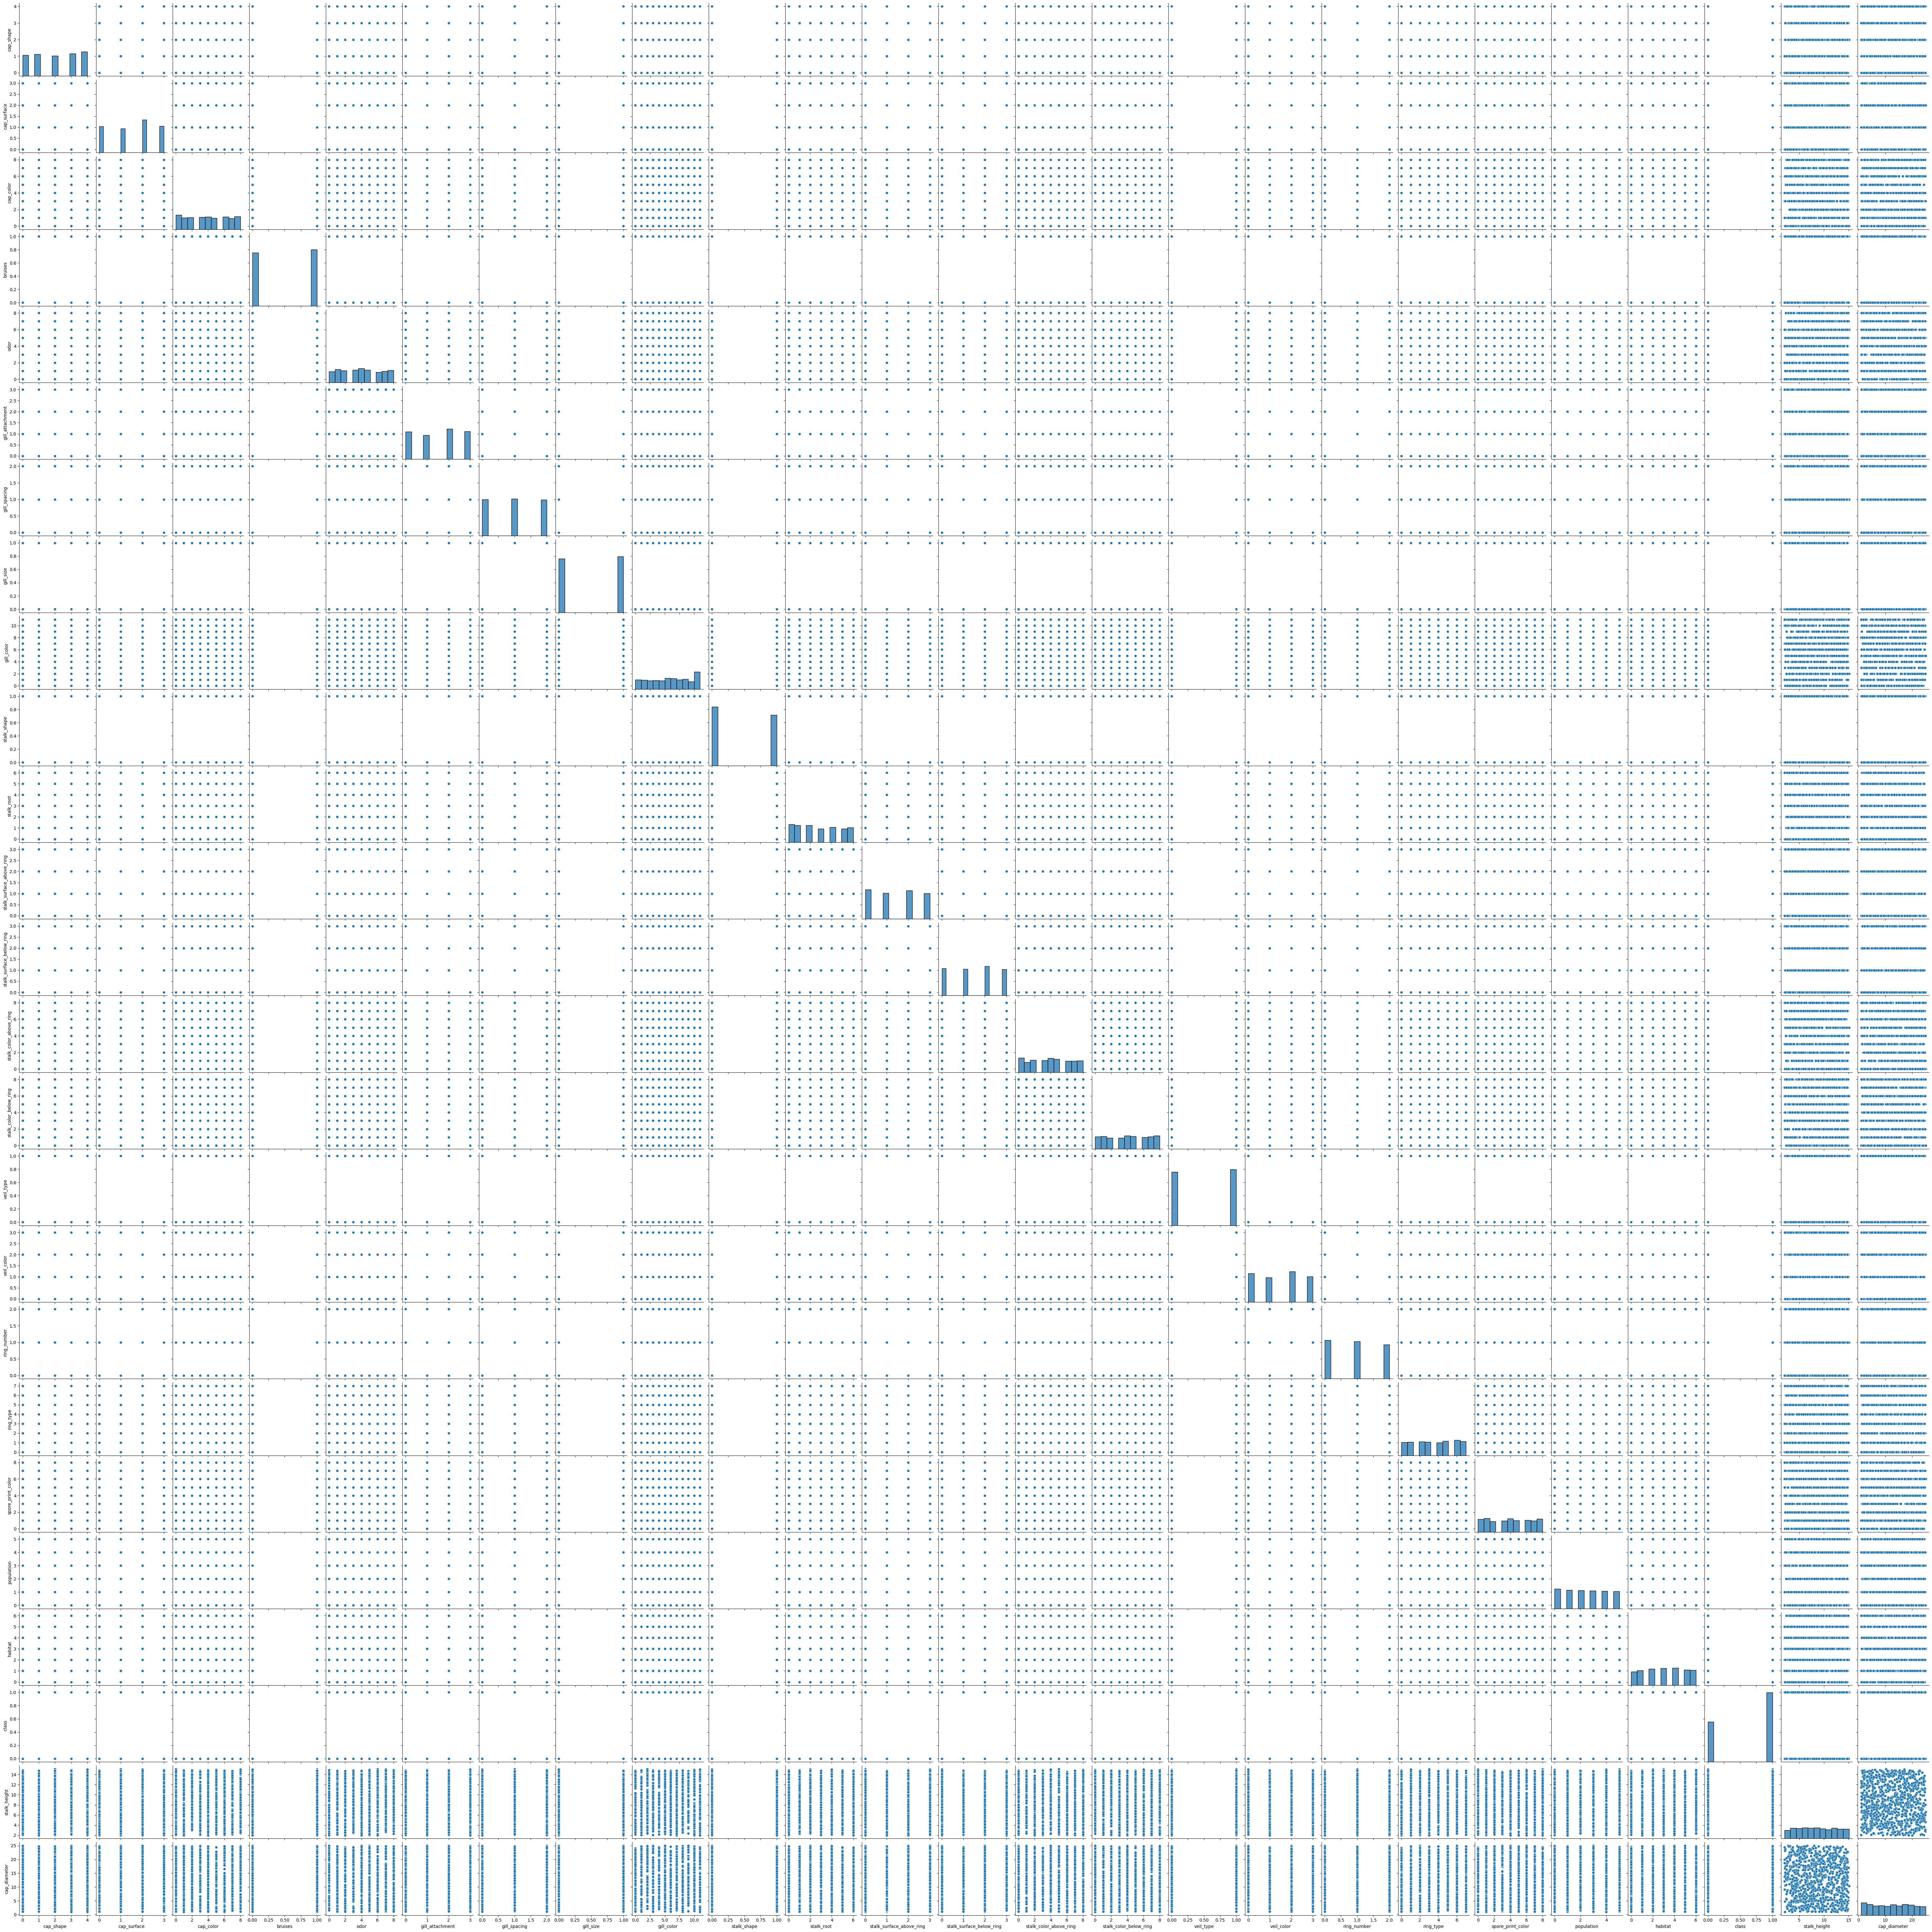

In [ ]:
sns.pairplot(mush)

In [ ]:
mush.corr()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
cap_shape,1.000000,0.024645,0.020694,-0.007043,-0.035072,0.017091,-0.026279,0.017675,0.050239,-0.013837,...,-0.015447,-0.004381,0.038398,0.012335,0.008641,0.009890,-0.003017,0.008132,-0.019087,0.015284
cap_surface,0.024645,1.000000,0.010129,-0.013355,-0.001229,-0.008412,0.033273,-0.046493,0.033423,-0.012625,...,-0.042954,0.027026,0.005017,0.002838,-0.057301,-0.026943,-0.038786,-0.047799,0.026016,0.030579
cap_color,0.020694,0.010129,1.000000,0.007862,-0.056524,0.000201,0.001367,0.034965,0.005884,-0.015452,...,-0.008664,-0.027817,0.037536,0.023527,0.045805,-0.039548,-0.006857,-0.048735,0.026948,0.006289
bruises,-0.007043,-0.013355,0.007862,1.000000,0.051111,0.006422,-0.017566,-0.004689,-0.033166,0.035013,...,0.007497,-0.023444,-0.037722,-0.067596,-0.028591,0.014990,0.011681,-0.007932,0.067729,-0.049061
odor,-0.035072,-0.001229,-0.056524,0.051111,1.000000,-0.013212,-0.030698,-0.057671,-0.030782,-0.003433,...,0.022875,0.033718,-0.031397,0.005064,-0.078276,-0.000816,-0.021675,0.009625,-0.002972,-0.043273
gill_attachment,0.017091,-0.008412,0.000201,0.006422,-0.013212,1.000000,-0.024634,-0.011606,0.026293,-0.021527,...,-0.044643,-0.005227,0.048239,-0.049124,-0.020564,0.003722,-0.020783,-0.023758,-0.002778,-0.012882
gill_spacing,-0.026279,0.033273,0.001367,-0.017566,-0.030698,-0.024634,1.000000,0.012648,-0.004135,0.060430,...,-0.027653,-0.003433,0.009182,0.008323,0.023472,0.005042,0.024691,0.045121,0.006502,0.034553
gill_size,0.017675,-0.046493,0.034965,-0.004689,-0.057671,-0.011606,0.012648,1.000000,-0.022993,-0.035478,...,-0.041509,-0.005179,-0.022972,0.005937,0.033767,0.002667,0.014063,0.019853,-0.017483,-0.029404
gill_color,0.050239,0.033423,0.005884,-0.033166,-0.030782,0.026293,-0.004135,-0.022993,1.000000,-0.040358,...,-0.024141,-0.011001,-0.021489,0.019591,0.005718,0.024611,0.014710,-0.000277,0.025211,-0.008795
stalk_shape,-0.013837,-0.012625,-0.015452,0.035013,-0.003433,-0.021527,0.060430,-0.035478,-0.040358,1.000000,...,0.018263,-0.032575,0.007748,0.023776,0.033676,-0.013345,-0.053501,0.028972,0.030180,-0.008562


**SPLITTING INTO X AND Y VARIABLE**

In [ ]:
x=mush.drop(['population'],axis=1)
y=mush['population']
x.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,8,0,0,2,6,3,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,0,1,0,2,6,1,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,3,1,3,2,6,6,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,5,0,3,2,0,4,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,7,1,2,0,4,8,4,1,14.037532,12.545245


In [ ]:
y.tail()

1985    2
1988    2
1989    0
1996    2
1999    2
Name: population, dtype: int64

In [ ]:
scale=StandardScaler()                 #SCALING THE DATA
scaled_data=scale.fit_transform(x)
scaled_data

array([[ 1.35139853,  0.41028546,  1.17233895, ...,  0.76110973,
         1.55397552, -1.08020133],
       [ 1.35139853, -1.40576266,  0.79119211, ..., -1.31387099,
        -1.23528506,  0.92643459],
       [ 0.65279421, -0.4977386 ,  0.41004527, ...,  0.76110973,
         0.14308581, -0.77220366],
       ...,
       [ 1.35139853,  1.31830952,  0.41004527, ..., -1.31387099,
         1.24539141,  0.44984086],
       [ 1.35139853,  0.41028546,  0.41004527, ...,  0.76110973,
        -0.54681571,  0.12936088],
       [-0.04581012,  0.41028546,  1.55348579, ...,  0.76110973,
         1.22711479,  1.21115202]])

**SPLITTING INTO TRAINIG AND TESTING**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((780, 24), (780,), (196, 24), (196,))

### **APPLYING SVM MODEL**

In [ ]:
model_def = SVC()
model_def.fit(x_train, y_train)
ypred = model_def.predict(x_test)

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.17      0.28      0.21        32
           1       0.15      0.08      0.10        39
           2       0.18      0.09      0.12        35
           3       0.12      0.29      0.17        24
           4       0.08      0.06      0.07        33
           5       0.17      0.12      0.14        33

    accuracy                           0.14       196
   macro avg       0.14      0.15      0.14       196
weighted avg       0.15      0.14      0.13       196



In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf','sigmoid'],'gamma':[0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0.1,0.001,0.0001]}]       #C= DEGREE OF TOLERANCE
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2,
                                1, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}, 0.18849147906585317)

In [ ]:
clf = SVC(kernel='rbf',C= 5, gamma = 0.01)
clf.fit(x_train , y_train)
y_pred_train= clf.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 97.82051282051282
[[140   0   1   1   1   1]
 [  1 123   2   0   0   1]
 [  0   0 127   0   0   1]
 [  2   1   0 132   1   0]
 [  0   1   0   2 122   0]
 [  0   0   0   1   0 119]]


In [ ]:
y_pred_test = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy = 17.857142857142858
[[ 6  3  4  5  6  8]
 [11  5  3 12  6  2]
 [10  4  5  2 10  4]
 [ 6  0  5  4  4  5]
 [10  6  2  3  9  3]
 [11  4  3  7  2  6]]


**NOW CHANGING INDEPENDENT VARIABLE**



In [ ]:
x=mush.drop(['class'],axis=1)
y=mush['class']
x.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,7,1,2,0,4,8,1,4,14.037532,12.545245


In [ ]:
scale=StandardScaler()                 #SCALING THE DATA
scaled_data=scale.fit_transform(x)
scaled_data

array([[ 1.35139853,  0.41028546,  1.17233895, ...,  0.99462141,
         1.55397552, -1.08020133],
       [ 1.35139853, -1.40576266,  0.79119211, ...,  0.99462141,
        -1.23528506,  0.92643459],
       [ 0.65279421, -0.4977386 ,  0.41004527, ...,  0.99462141,
         0.14308581, -0.77220366],
       ...,
       [ 1.35139853,  1.31830952,  0.41004527, ..., -1.57622207,
         1.24539141,  0.44984086],
       [ 1.35139853,  0.41028546,  0.41004527, ...,  0.99462141,
        -0.54681571,  0.12936088],
       [-0.04581012,  0.41028546,  1.55348579, ...,  0.48045272,
         1.22711479,  1.21115202]])

**SPLITTING INTO TRAINIG AND TESTING**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2)

**APPLYING SVM MODEL**

In [ ]:
model_def = SVC()
model_def.fit(x_train, y_train)
ypred = model_def.predict(x_test)

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.62      1.00      0.77       122

    accuracy                           0.62       196
   macro avg       0.31      0.50      0.38       196
weighted avg       0.39      0.62      0.48       196



In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf','sigmoid'],'gamma':[0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0.1,0.001,0.0001]}]       #C= DEGREE OF TOLERANCE
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2,
                                1, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 0.001, 'kernel': 'rbf'}, 0.6342310119924258)

In [ ]:
clf = SVC(kernel='rbf',C= 15, gamma = 0.001)
clf.fit(x_train , y_train)
y_pred_train= clf.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 64.74358974358975
[[ 10 274]
 [  1 495]]


In [ ]:
y_pred_test = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy = 61.224489795918366
[[  0  74]
 [  2 120]]
